# Prediction of sales

### Problem Statement
This dataset represents sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store are available. The aim is to build a predictive model and find out the sales of each product at a particular store.


|Variable | Description|
|: ------------- |:-------------|
|Item_Identifier | Unique product ID|
|Item_Weight|Weight of product|
|Item_Fat_Content|Whether the product is low fat or not|
|Item_Visibility|The % of total display area of all products in a store allocated to the particular product|
|Item_Type|The category to which the product belongs|
|Item_MRP|Maximum Retail Price (list price) of the product|
|Outlet_Identifier|Unique store ID|
|Outlet_Establishment_Year|The year in which store was established|
|Outlet_Size|The size of the store in terms of ground area covered|
|Outlet_Location_Type|The type of city in which the store is located|
|Outlet_Type|Whether the outlet is just a grocery store or some sort of supermarket|
|Item_Outlet_Sales|Sales of the product in the particulat store. This is the outcome variable to be predicted.|



Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

#### `GOAL: Build a predictive model and find out the sales of each product at a particular store.`

In [81]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
# read in the dataset
df = pd.read_csv('/Users/patrick/Desktop/Lighthouse_labs/Lighthouse-data-notes/Unit 6/Day_4/model-evaluation/regression_exercise_cleaned.csv')

In [125]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Type_Combined,Outlet_Years,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,1,0.016047,249.8092,9,1999,3735.1380,0,14,0,1,0,1,0,0,0,1,0,0
1,5.92,2,0.019278,48.2692,3,2009,443.4228,1,4,0,1,0,0,0,1,0,0,1,0
2,17.50,1,0.016760,141.6180,9,1999,2097.2700,0,14,0,1,0,1,0,0,0,1,0,0
3,19.20,2,0.000000,182.0950,0,1998,732.3800,0,15,0,0,0,0,0,1,1,0,0,0
4,8.93,0,0.000000,53.8614,1,1987,994.7052,2,26,1,0,0,0,0,1,0,1,0,0


In [126]:
# impute nan values in item_weight with mean value where item type is the same
df['Item_Weight'] = df.groupby('Item_Type_Combined')['Item_Weight'].transform(lambda x: x.fillna(x.mean()))

In [127]:
# drop outlet_identifier, Outlet_Establishment_Year, Item_Type_Combined. These are not useful for our model
df_model = df.drop(['Outlet_Identifier', 'Outlet_Establishment_Year', 'Item_Type_Combined',], axis=1)


In [128]:
# select the first 6 columns as features
model_df = df_model.iloc[:, :5]

In [129]:
model_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,9.30,1,0.016047,249.8092,3735.1380
1,5.92,2,0.019278,48.2692,443.4228
2,17.50,1,0.016760,141.6180,2097.2700
3,19.20,2,0.000000,182.0950,732.3800
4,8.93,0,0.000000,53.8614,994.7052


In [130]:
# add 0.1 to the target variable to avoid log(0)
model_df['Item_Outlet_Sales'] = model_df['Item_Outlet_Sales'] + 0.01

In [131]:
# add 0.01 to all the features to avoid log(0)
model_df.iloc[:, :-1] = model_df.iloc[:, :-1] + 0.01

In [132]:
# move the target variable to the last column
model_df = model_df[[c for c in model_df if c not in ['Item_Outlet_Sales']] + ['Item_Outlet_Sales']]

In [133]:
model_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,9.31,1.01,0.026047,249.8192,3735.1480
1,5.93,2.01,0.029278,48.2792,443.4328
2,17.51,1.01,0.026760,141.6280,2097.2800
3,19.21,2.01,0.010000,182.1050,732.3900
4,8.94,0.01,0.010000,53.8714,994.7152


In [134]:
# check for nan values
model_df.isna().sum()

Item_Weight          0
Item_Fat_Content     0
Item_Visibility      0
Item_MRP             0
Item_Outlet_Sales    0
dtype: int64

We have covered data preparation and feature engineering two weeks ago. Now, it's time to do some predictive models.

## Model Building

## Task
Make a baseline model. Baseline models help us set a benchmark to gauge the performance of our future models. If your new model is below the baseline, something has gone wrong, and you should check your data.

To make a baseline model, run a simple regression model without altering the default parameters in sklearn. 

In [135]:
# split the data into train and test sets for baseline 
from sklearn.model_selection import train_test_split

X = model_df.iloc[:, :-1]
y = model_df.iloc[:, -1]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [136]:
# scale columns using StandardScaler inplace

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled.shape
y_scaled = sc.fit_transform(y.values.reshape(-1,1))
#transform y_scaled back to pandas series
y_scaled = pd.Series(y_scaled.ravel())
y_scaled.shape

# scale y_train and y_test using StandardScaler

(8523,)

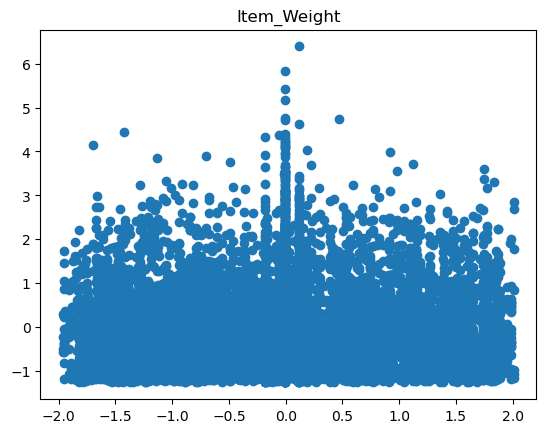

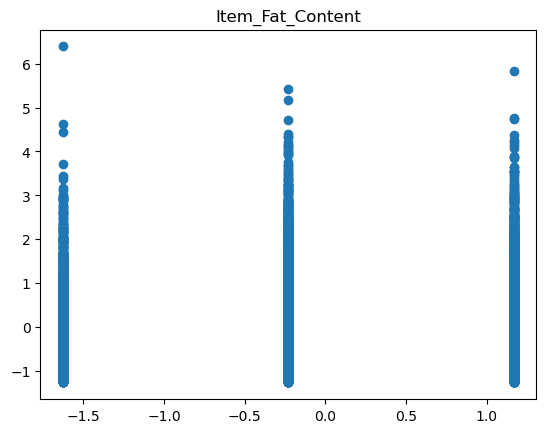

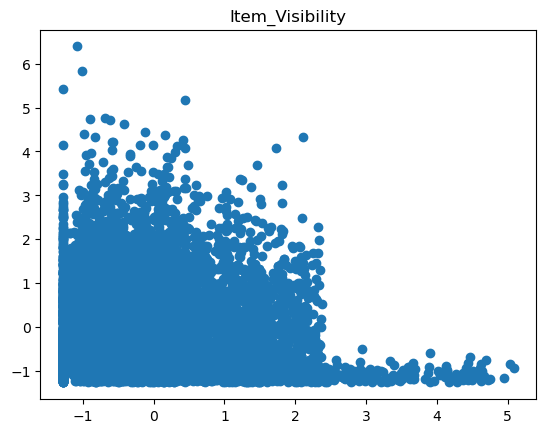

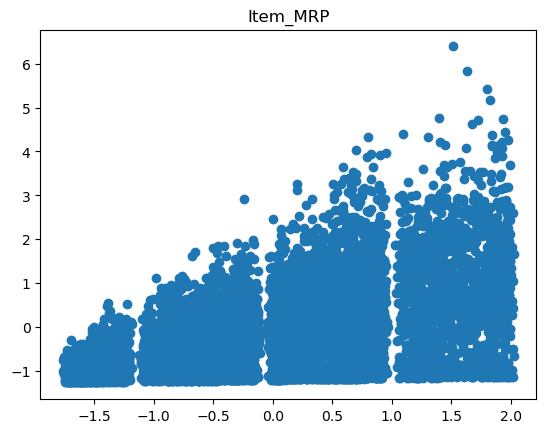

In [137]:
# scatter plot of each feature vs target variable
for i in range(X_scaled.shape[1]):
    plt.scatter(X_scaled[:, i], y_scaled)
    plt.title(X.columns[i])
    plt.show()

In [113]:
y_scaled.shape

(8523,)

In [142]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()

In [140]:
# fit the model with data
result = model.fit(X_scaled, y_scaled)

In [144]:
r2_score(result)

TypeError: r2_score() missing 1 required positional argument: 'y_pred'

## Task
Split your data in 80% train set and 20% test set.

## Task
Use grid_search to find the best value of the parameter `alpha` for Ridge and Lasso regressions from `sklearn`.

## Task
Using the model from grid_search, predict the values in the test set and compare against your benchmark.